In [1]:
%pip install pandas openpyxl matplotlib scikit-learn seaborn

  Using cached scikit_learn-1.6.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached scipy-1.15.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.6.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.1 MB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached scipy-1.15.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (37.3 MB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
Note: you may need to restart the kernel to use updated packages.


In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import math

In [2]:
data = pd.read_excel('./data/processed.xlsx', index_col=0)
data.head()

,Текст,Пол,length,mean_usage_[URL],mean_usage_[EMAIL],mean_usage_[PHONE],mean_usage_[ADDRESS],mean_usage_[DATE],mean_usage_[TIME],mean_usage_[QUANTITY],...,mean_usage_NUM,mean_usage_VERB,mean_usage_PART,mean_usage_PRON,mean_usage_SCONJ,mean_usage_sentence_length,mean_token_length,lemm_sentences,sentences_count,mean_usage_#
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,"Сегодня, моё беззаботное детство и суетливое н...",женский,2062,0.0,0.0,0.0,0.000000,0.029412,0.0,0.0,...,0.117647,1.411765,0.117647,0.205882,0.000,10.529412,6.893617,"[[""сегодня"", ""беззаботный"", ""детство"", ""суетли...",34,NaN
2,Я твёрдо решила больше никогда не спорить с гл...,женский,1052,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,1.833333,0.000000,0.333333,0.000,12.666667,7.149425,"[[""твердо"", ""решить"", ""большой"", ""спорить"", ""г...",12,NaN
3,Спасибо большое Саше за помощь при регистрации...,женский,1303,0.0,0.0,0.0,0.058824,0.000000,0.0,0.0,...,0.000000,1.764706,0.117647,0.411765,0.000,13.176471,7.024000,"[[""спасибо"", ""большой"", ""ваш"", ""помощь"", ""реги...",17,NaN
4,Ох. Я заболела. Ну и пускай :) Давно со мной т...,женский,1040,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,1.409091,0.090909,0.090909,0.000,8.636364,7.303371,"[[""ох""], [""заболеть""], [""пускай""], [""давно"", ""...",22,NaN
5,1. имею родимое пятно на правой руке. в детств...,женский,3398,0.0,0.0,0.0,0.250000,0.000000,0.0,0.0,...,0.125000,10.625000,0.375000,1.125000,0.125,74.875000,7.075862,"[[""иметь"", ""родимый"", ""пятно"", ""правый"", ""рука...",8,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13755 entries, 0 to 16958
Data columns (total 43 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Текст                       13755 non-null  object 
 1   Пол                         13755 non-null  object 
 2   length                      13755 non-null  int64  
 3   mean_usage_[URL]            13755 non-null  float64
 4   mean_usage_[EMAIL]          13755 non-null  float64
 5   mean_usage_[PHONE]          13755 non-null  float64
 6   mean_usage_[ADDRESS]        13755 non-null  float64
 7   mean_usage_[DATE]           13755 non-null  float64
 8   mean_usage_[TIME]           13755 non-null  float64
 9   mean_usage_[QUANTITY]       13755 non-null  float64
 10  mean_usage_[ORDINARY]       13755 non-null  float64
 11  mean_usage_[NUMBER]         13755 non-null  float64
 12  mean_usage_[QUOTE]          13755 non-null  float64
 13  mean_usage_[SMILE]          13755 no

In [4]:
cols = ['mean_usage_[URL]', 'mean_usage_[EMAIL]',
       'mean_usage_[PHONE]', 'mean_usage_[ADDRESS]', 'mean_usage_[DATE]',
       'mean_usage_[TIME]', 'mean_usage_[QUANTITY]', 'mean_usage_[ORDINARY]',
       'mean_usage_[NUMBER]', 'mean_usage_[QUOTE]', 'mean_usage_[SMILE]',
       'mean_usage_[PUNCEM]', 'mean_usage_[REMOVED]', 'mean_usage_,',
       'mean_usage_!', 'mean_usage_?', 'mean_usage_;', 'mean_usage_:',
       'mean_usage_-', 'mean_usage_(', 'mean_usage_)', 'mean_usage_ADJ',
       'mean_usage_ADP', 'mean_usage_ADV', 'mean_usage_AUX', 'mean_usage_INTJ',
       'mean_usage_CCONJ', 'mean_usage_NOUN', 'mean_usage_DET',
       'mean_usage_PROPN', 'mean_usage_NUM', 'mean_usage_VERB',
       'mean_usage_PART', 'mean_usage_PRON', 'mean_usage_SCONJ',
       'mean_usage_sentence_length', 'mean_token_length',
       'sentences_count']

(data[cols] == data[cols].min()).mean() * 100

mean_usage_[URL]              58.247910
mean_usage_[EMAIL]            99.142130
mean_usage_[PHONE]            99.694656
mean_usage_[ADDRESS]          63.671392
mean_usage_[DATE]             76.437659
mean_usage_[TIME]             90.723373
mean_usage_[QUANTITY]         78.233370
mean_usage_[ORDINARY]         92.031988
mean_usage_[NUMBER]           40.065431
mean_usage_[QUOTE]            26.426754
mean_usage_[SMILE]            75.499818
mean_usage_[PUNCEM]           46.324973
mean_usage_[REMOVED]          62.028353
mean_usage_,                   0.123591
mean_usage_!                  49.298437
mean_usage_?                  48.367866
mean_usage_;                  91.254089
mean_usage_:                  33.856779
mean_usage_-                   3.976736
mean_usage_(                  34.518357
mean_usage_)                  31.254089
mean_usage_ADJ                 0.007270
mean_usage_ADP                36.364958
mean_usage_ADV                 0.101781
mean_usage_AUX                99.534715


In [ ]:
data = data.drop(columns=[
    # null
    'mean_usage_#', 
    # > 75
    'mean_usage_[EMAIL]', 
    'mean_usage_[PHONE]', 
    'mean_usage_[DATE]', 
    'mean_usage_[TIME]', 
    'mean_usage_[QUANTITY]',
    'mean_usage_[ORDINARY]', 
    'mean_usage_[SMILE]', 
    'mean_usage_;', 
    'mean_usage_AUX', 
    'mean_usage_INTJ',
    'mean_usage_CCONJ',
    'mean_usage_PROPN'])


In [6]:
cols = [ 'mean_usage_[URL]', 'mean_usage_[ADDRESS]', 'mean_usage_SCONJ', "mean_usage_[REMOVED]", "mean_usage_!", "mean_usage_?"  ]
for col in cols:
    min = data[col].min()
    data[col] = data[col].where(data[col] == min, 1)

In [ ]:
bad_sentinize_mask = (data['sentences_count'] <= 10) | (data['sentences_count'] >= 100 )
data = data[~bad_sentinize_mask]

In [9]:
gender_map = {'мужской': 1, 'женский': 0}
data['Пол'] = data['Пол'].map(gender_map)

In [38]:
data.to_excel("./data/with_noises.xlsx")

In [10]:
feature_cols = [
    'mean_usage_[URL]',
    'mean_usage_[ADDRESS]',
    'mean_usage_[NUMBER]', 'mean_usage_[QUOTE]',
    'mean_usage_[PUNCEM]', 'mean_usage_[REMOVED]', 'mean_usage_,',
    'mean_usage_!', 'mean_usage_?', 'mean_usage_:',
    'mean_usage_-', 'mean_usage_(', 'mean_usage_)', 'mean_usage_ADJ',
    'mean_usage_ADP', 'mean_usage_ADV',
    'mean_usage_NOUN', 'mean_usage_DET',
    'mean_usage_NUM', 'mean_usage_VERB',
    'mean_usage_PART', 'mean_usage_PRON', 'mean_usage_SCONJ',
    'mean_usage_sentence_length', 'mean_token_length',
    'sentences_count' 
]
target_col = 'Пол'

In [11]:
data[feature_cols].describe()

,mean_usage_[URL],mean_usage_[ADDRESS],mean_usage_[NUMBER],mean_usage_[QUOTE],mean_usage_[PUNCEM],mean_usage_[REMOVED],"mean_usage_,",mean_usage_!,mean_usage_?,mean_usage_:,...,mean_usage_NOUN,mean_usage_DET,mean_usage_NUM,mean_usage_VERB,mean_usage_PART,mean_usage_PRON,mean_usage_SCONJ,mean_usage_sentence_length,mean_token_length,sentences_count
count,12222.000000,12222.000000,12222.000000,12222.000000,12222.000000,12222.000000,12222.000000,12222.000000,12222.000000,12222.000000,...,12222.000000,12222.000000,12222.000000,12222.000000,12222.000000,12222.000000,12222.000000,12222.000000,12222.000000,12222.000000
mean,0.418262,0.372361,0.113428,0.120001,0.072084,0.382834,1.370335,0.523728,0.539355,0.083011,...,3.384260,0.222084,0.055006,1.866106,0.082667,0.287294,0.404107,15.752945,7.015906,29.490509
std,0.493294,0.483454,0.218763,0.159165,0.159593,0.486098,0.676484,0.499457,0.498469,0.130093,...,1.436171,0.152829,0.073171,0.674081,0.077700,0.176705,0.490739,5.154777,0.424334,15.863237
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.250000,0.000000,0.000000,0.056604,0.000000,0.000000,0.000000,1.769231,4.773196,11.000000
25%,0.000000,0.000000,0.000000,0.010961,0.000000,0.000000,0.925926,0.000000,0.000000,0.000000,...,2.413043,0.117647,0.000000,1.424242,0.029412,0.163265,0.000000,12.333333,6.737108,18.000000
50%,0.000000,0.000000,0.045455,0.073171,0.025641,0.000000,1.259259,1.000000,1.000000,0.050000,...,3.118846,0.191176,0.038462,1.772727,0.066667,0.256950,0.000000,14.974679,6.987539,25.000000
75%,1.000000,1.000000,0.133943,0.166667,0.083333,1.000000,1.681818,1.000000,1.000000,0.111111,...,4.041454,0.290323,0.076923,2.195652,0.117647,0.375000,1.000000,18.133333,7.268012,37.000000
max,1.000000,1.000000,4.363636,5.428571,4.437500,1.000000,10.727273,1.000000,1.000000,2.214286,...,24.538462,2.000000,1.076923,10.909091,0.909091,2.363636,1.000000,68.153846,8.962500,99.000000


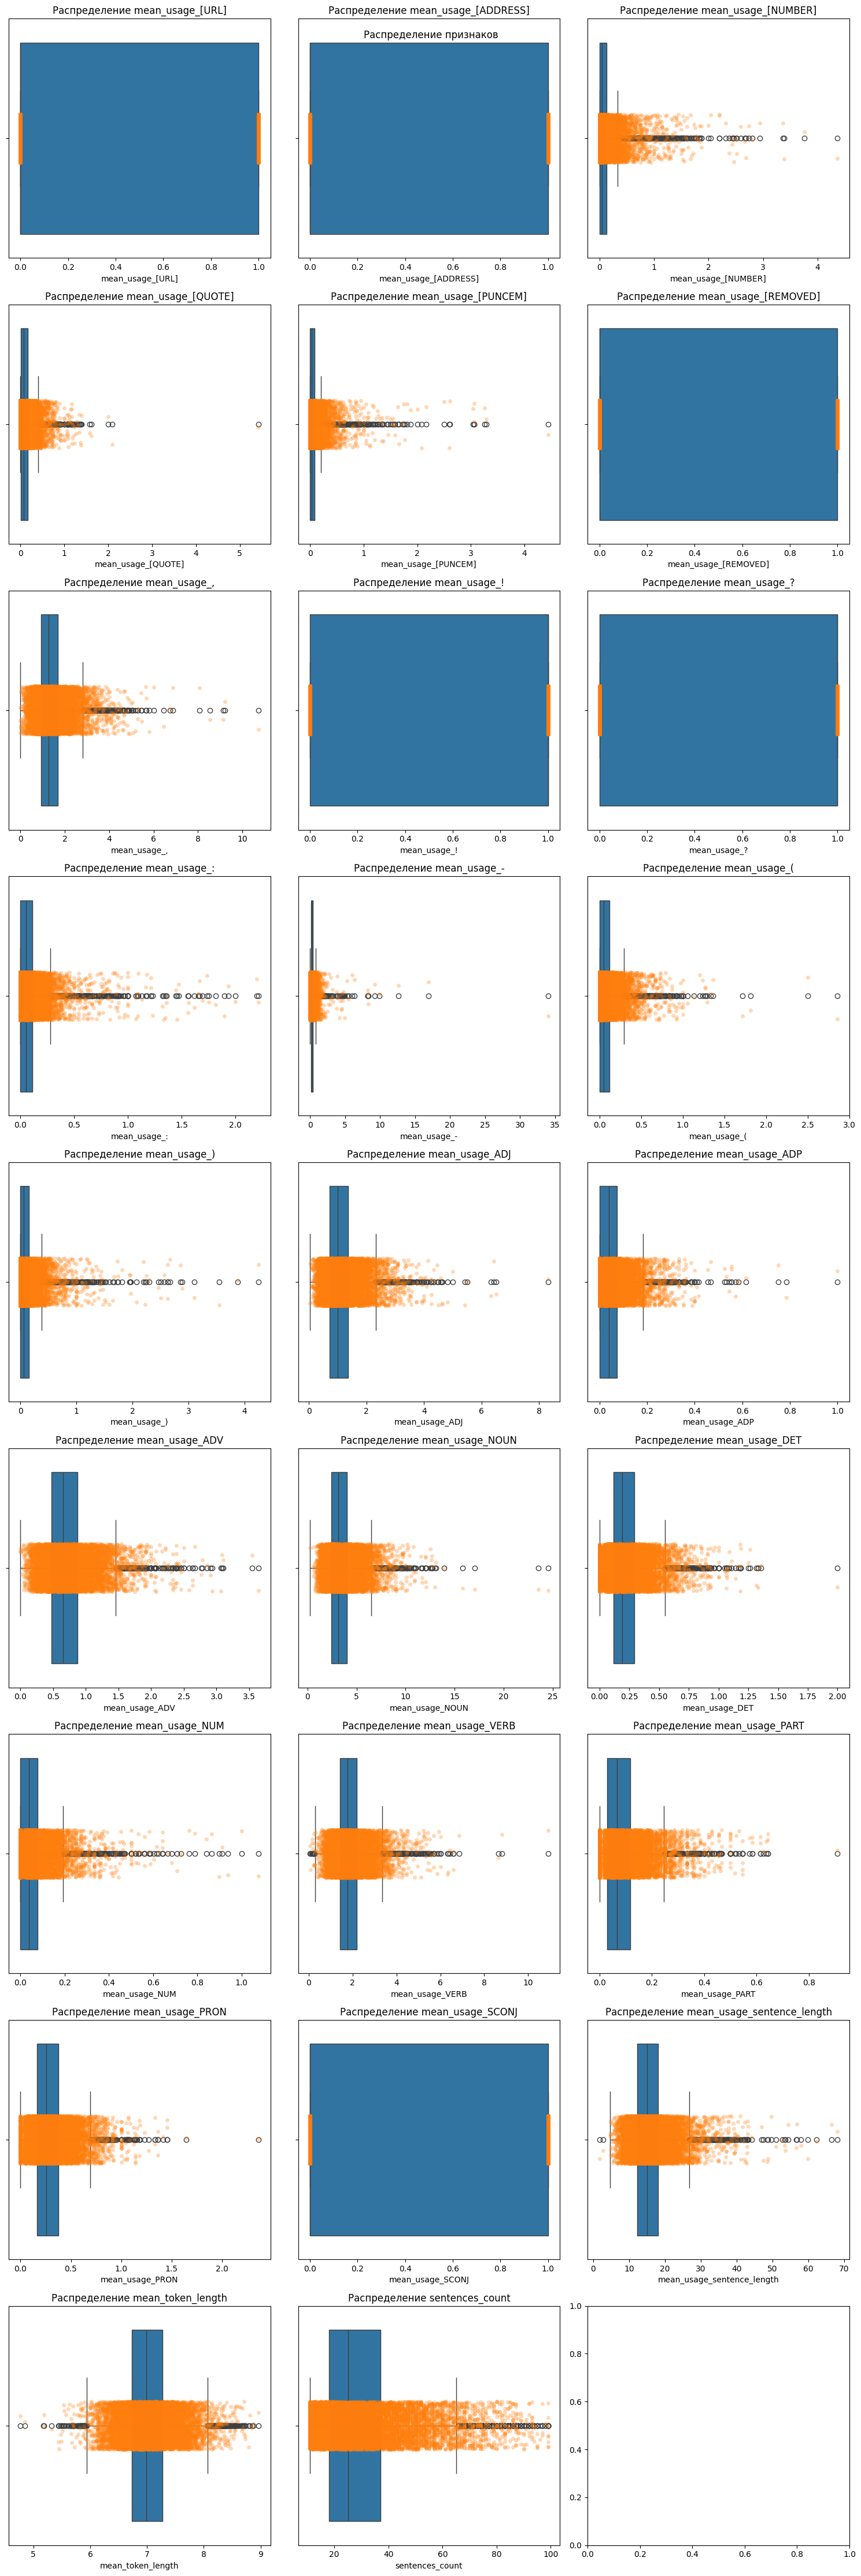

In [ ]:
def print_boxplot(df, cols, title=None):
    ncols = 3
    nrows = math.ceil(len(cols) / ncols)
    fig, axes = plt.subplots(nrows, ncols, figsize=(15, 5*nrows))
    
    for col, ax in zip(cols, axes.flatten()):
        sns.boxplot(x=df[col], ax=ax)
        sns.stripplot(x=df[col], alpha=0.3, ax=ax)
        ax.set_title(f'Распределение {col}')
    
    if title:
        fig.suptitle(title)
        
    plt.tight_layout()
    plt.show()

print_boxplot(data, feature_cols, title='Распределение признаков')

In [16]:
def print_noise_info(df, cols, thrashold=1.5):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers = df[(df[col] < Q1 - thrashold*IQR) | (df[col] > Q3 + thrashold*IQR)]
        print(f"{col}: {len(outliers)} выбросов (IQR)")

print_noise_info(data, feature_cols, thrashold=2)

mean_usage_[URL]: 0 выбросов (IQR)
mean_usage_[ADDRESS]: 0 выбросов (IQR)
mean_usage_[NUMBER]: 745 выбросов (IQR)
mean_usage_[QUOTE]: 390 выбросов (IQR)
mean_usage_[PUNCEM]: 732 выбросов (IQR)
mean_usage_[REMOVED]: 0 выбросов (IQR)
mean_usage_,: 212 выбросов (IQR)
mean_usage_!: 0 выбросов (IQR)
mean_usage_?: 0 выбросов (IQR)
mean_usage_:: 370 выбросов (IQR)
mean_usage_-: 376 выбросов (IQR)
mean_usage_(: 434 выбросов (IQR)
mean_usage_): 504 выбросов (IQR)
mean_usage_ADJ: 222 выбросов (IQR)
mean_usage_ADP: 229 выбросов (IQR)
mean_usage_ADV: 176 выбросов (IQR)
mean_usage_NOUN: 214 выбросов (IQR)
mean_usage_DET: 239 выбросов (IQR)
mean_usage_NUM: 350 выбросов (IQR)
mean_usage_VERB: 170 выбросов (IQR)
mean_usage_PART: 225 выбросов (IQR)
mean_usage_PRON: 172 выбросов (IQR)
mean_usage_SCONJ: 0 выбросов (IQR)
mean_usage_sentence_length: 212 выбросов (IQR)
mean_token_length: 77 выбросов (IQR)
sentences_count: 207 выбросов (IQR)


In [20]:
def remove_outliers_iqr(df, columns, threshold=1.5):
    df_clean = df.copy()
    masks = []
    
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        mask = (df_clean[col] >= Q1 - threshold*IQR) & (df_clean[col] <= Q3 + threshold*IQR)
        masks.append(mask)
    
    final_mask = pd.concat(masks, axis=1).all(axis=1)
    return df_clean[final_mask]

In [ ]:
clean_data = remove_outliers_iqr(data, [ 
    'mean_usage_[NUMBER]',
    'mean_usage_[QUOTE]',
    'mean_usage_[PUNCEM]',
    'mean_usage_,',
    'mean_usage_:',
    'mean_usage_-',
    'mean_usage_(',
    'mean_usage_)',
    "mean_usage_ADJ",
    "mean_usage_ADP",
    "mean_usage_ADV",
    "mean_usage_NOUN",
    "mean_usage_DET",
    "mean_usage_NUM",
    "mean_usage_VERB",
    "mean_usage_PART",
    "mean_usage_PRON",
    'mean_usage_sentence_length',
    'mean_token_length' ], threshold=2)

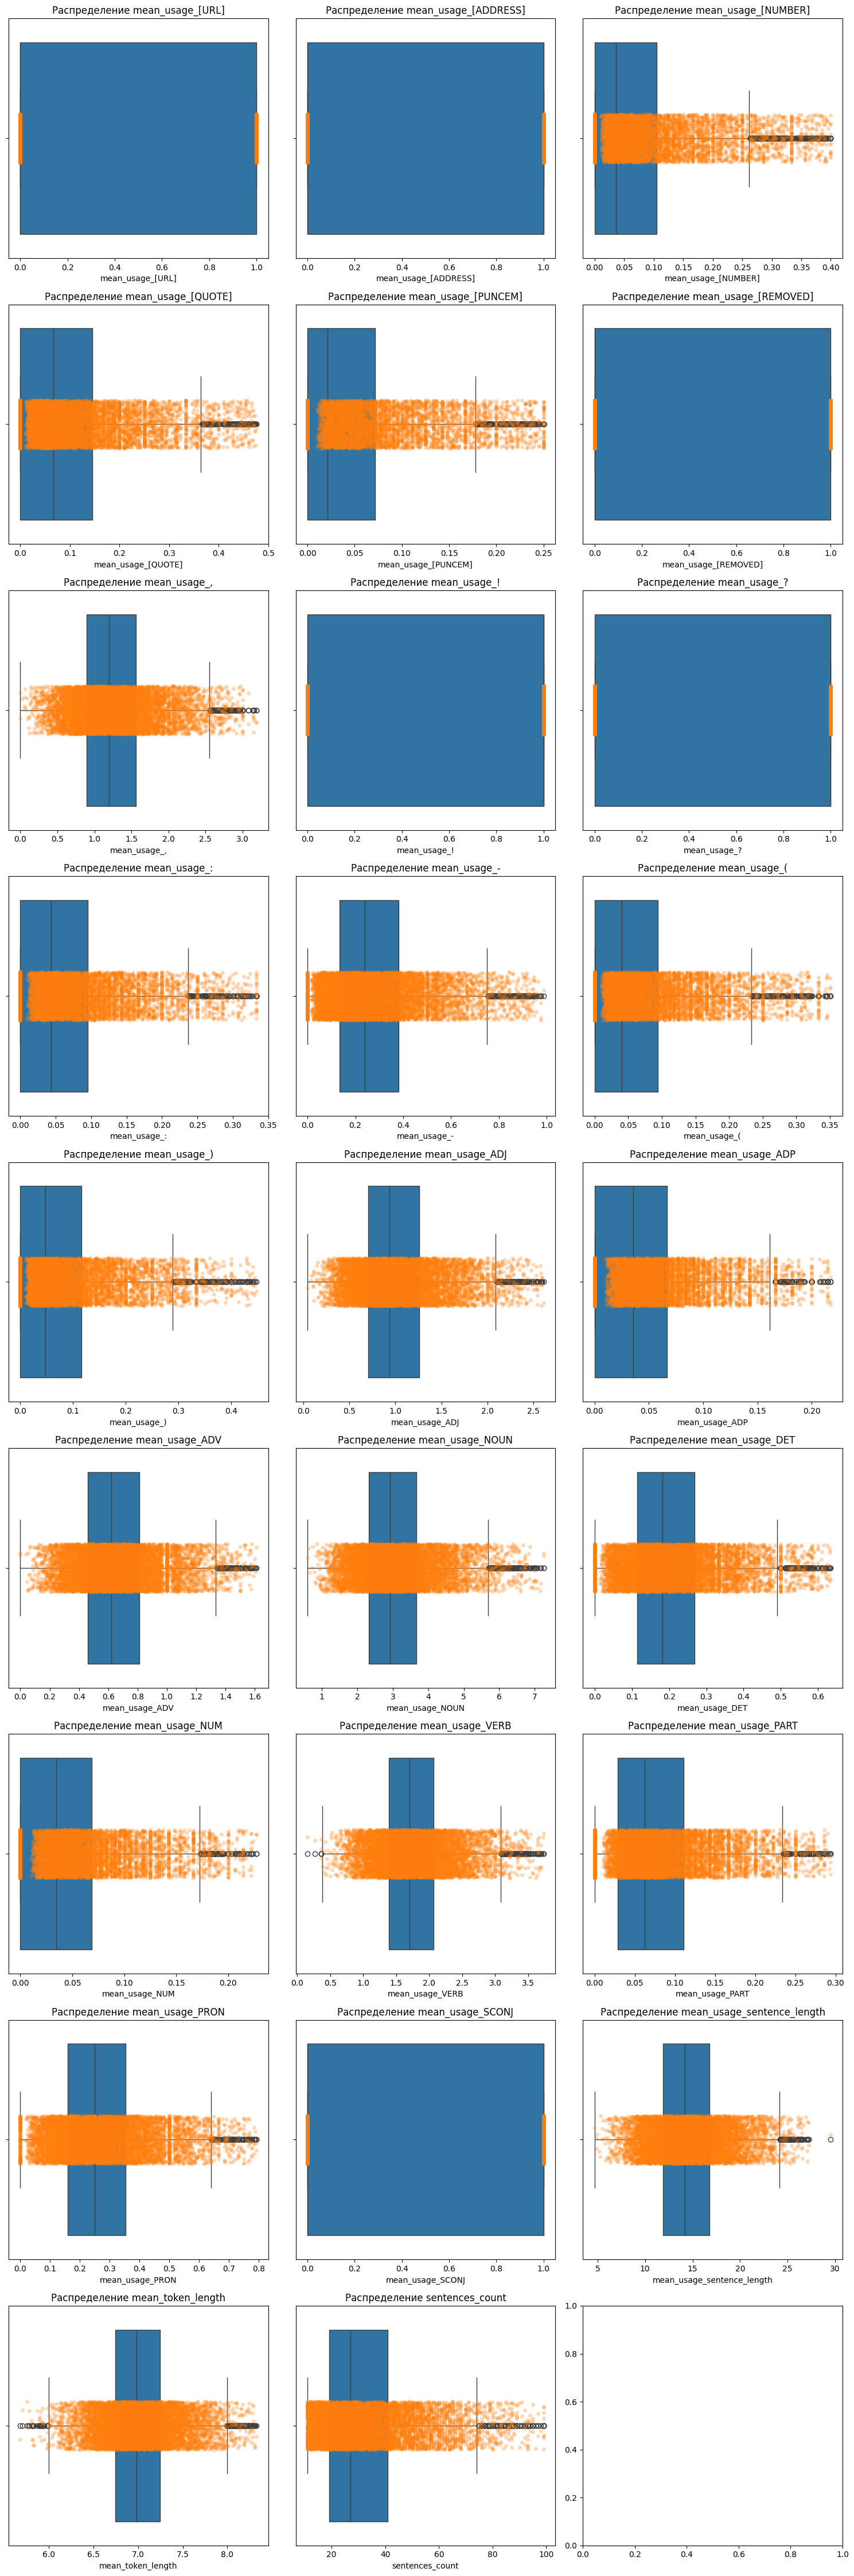

In [23]:
print_boxplot(clean_data, feature_cols)

In [37]:
clean_data.to_excel("./data/clean_data.xlsx")

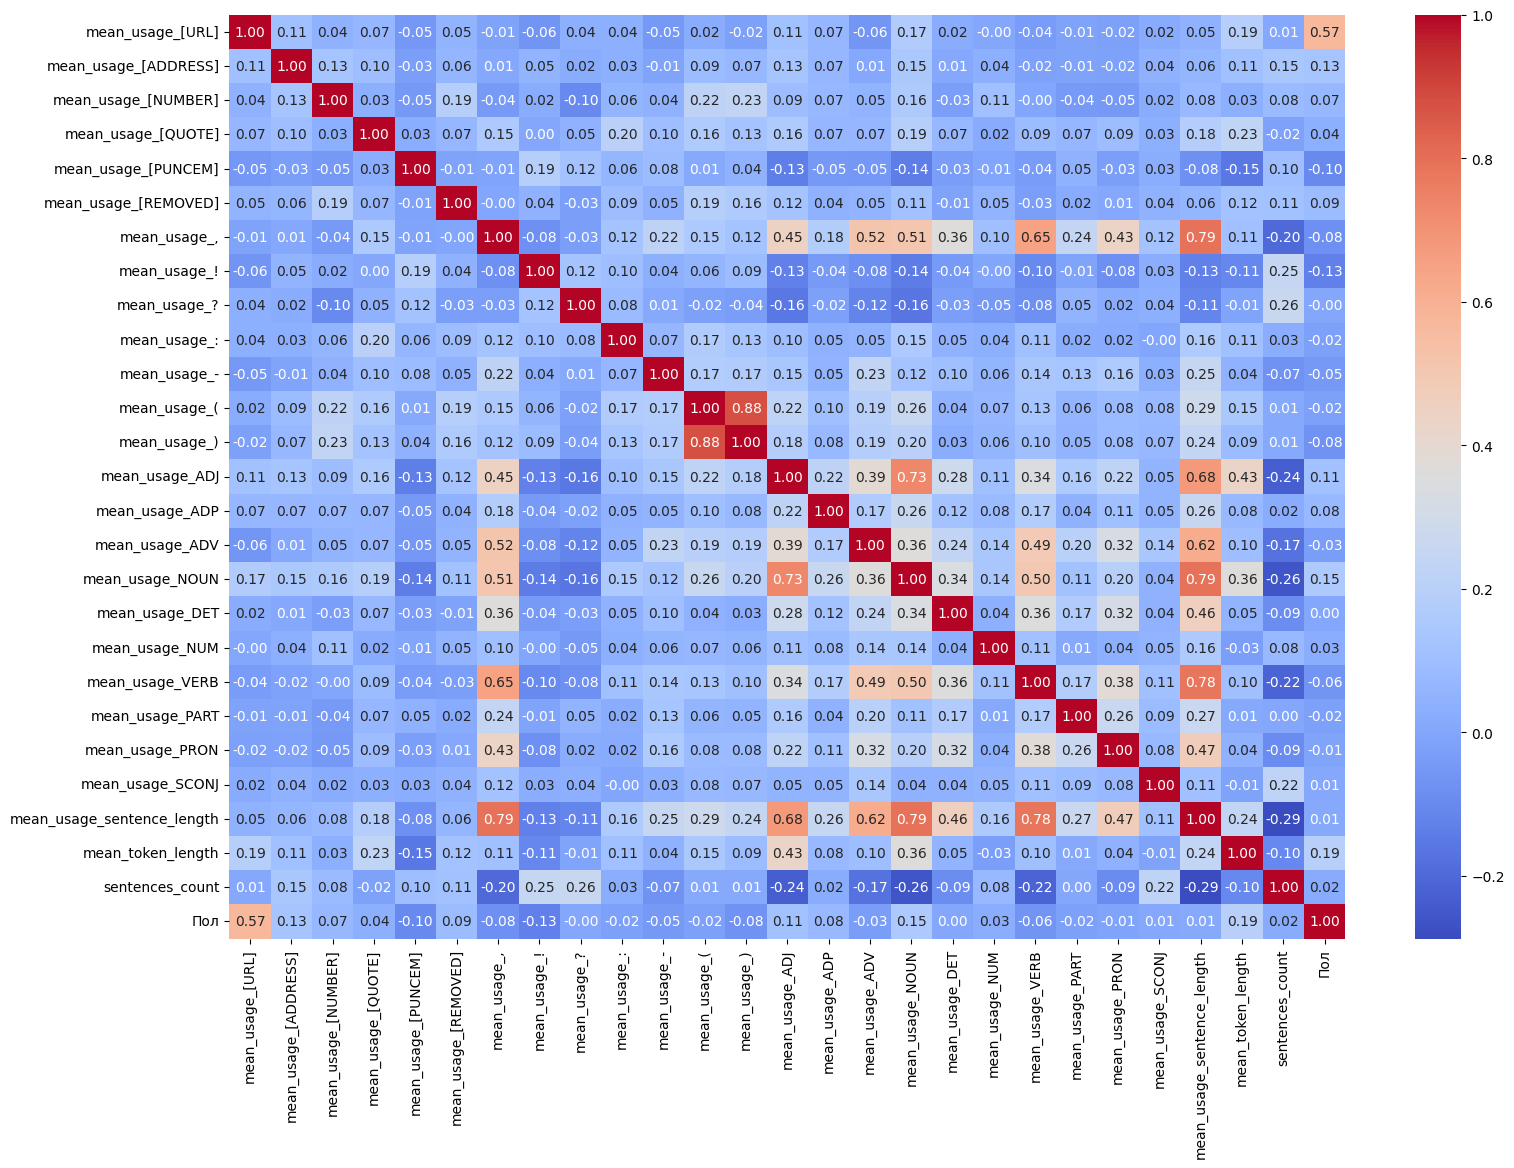

In [35]:
corr_matrix = clean_data[feature_cols + [target_col]].corr(method='spearman')
plt.figure(figsize=(18, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()